# COVID-19 Vaccinations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

#### Gather data from https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

#### See codebook here: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv

In [3]:
df_world = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv', parse_dates=['date']).set_index(['location', 'date']).sort_index()
df_world

iso_code continent  total_cases  new_cases  \
location    date                                                    
Afghanistan 2020-02-24      AFG      Asia          1.0        1.0   
            2020-02-25      AFG      Asia          1.0        0.0   
            2020-02-26      AFG      Asia          1.0        0.0   
            2020-02-27      AFG      Asia          1.0        0.0   
            2020-02-28      AFG      Asia          1.0        0.0   
...                         ...       ...          ...        ...   
Zimbabwe    2021-03-18      ZWE    Africa      36611.0       59.0   
            2021-03-19      ZWE    Africa      36652.0       41.0   
            2021-03-20      ZWE    Africa      36662.0       10.0   
            2021-03-21      ZWE    Africa      36665.0        3.0   
            2021-03-22      ZWE    Africa      36684.0       19.0   

                        new_cases_smoothed  total_deaths  new_deaths  \
location    date                                                       
Afghanistan 2020-02-24                 NaN           NaN         NaN   
            2020-02-25                 NaN           NaN         NaN   
            2020-02-26                 NaN           NaN         NaN   
            2020-02-27                 NaN           NaN         NaN   
            2020-02-28                 NaN           NaN         NaN   
...                                    ...           ...         ...   
Zimbabwe    2021-03-18              33.429        1509.0         1.0   
            2021-03-19              32.714        1510.0         1.0   
            2021-03-20              27.286        1510.0         0.0   
            2021-03-21              25.857        1512.0         2.0   
            2021-03-22              25.714        1514.0         2.0   

                        new_deaths_smoothed  total_cases_per_million  \
location    date                                                       
Afghanistan 2020-02-24                  NaN                    0.026   
            2020-02-25                  NaN                    0.026   
            2020-02-26                  NaN                    0.026   
            2020-02-27                  NaN                    0.026   
            2020-02-28                  NaN                    0.026   
...                                     ...                      ...   
Zimbabwe    2021-03-18                2.429                 2463.243   
            2021-03-19                2.000                 2466.001   
            2021-03-20                1.286                 2466.674   
            2021-03-21                1.286                 2466.876   
            2021-03-22                1.429                 2468.154   

                        new_cases_per_million  ...  gdp_per_capita  \
location    date                               ...                   
Afghanistan 2020-02-24                  0.026  ...        1803.987   
            2020-02-25                  0.000  ...        1803.987   
            2020-02-26                  0.000  ...        1803.987   
            2020-02-27                  0.000  ...        1803.987   
            2020-02-28                  0.000  ...        1803.987   
...                                       ...  ...             ...   
Zimbabwe    2021-03-18                  3.970  ...        1899.775   
            2021-03-19                  2.759  ...        1899.775   
            2021-03-20                  0.673  ...        1899.775   
            2021-03-21                  0.202  ...        1899.775   
            2021-03-22                  1.278  ...        1899.775   

                        extreme_poverty  cardiovasc_death_rate  \
location    date                                                 
Afghanistan 2020-02-24              NaN                597.029   
            2020-02-25              NaN                597.029   
            2020-02-26              NaN                597.029   
          

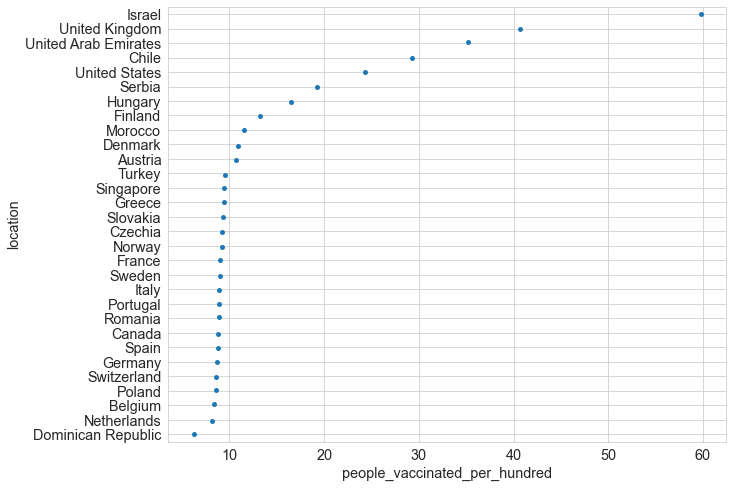

In [38]:
df_plot = df_world[df_world.population > 5000000].loc[set(df_world.index.get_level_values('location')).difference(['Africa','World', 'Europe','Asia', 'European Union', 'South America', 'North America'])].sort_index().reset_index().groupby('location').last().nlargest(30, 'people_vaccinated_per_hundred')
fig, ax = plt.subplots(figsize=(10,8))
sns.stripplot(data=df_plot, y=df_plot.index, x='people_vaccinated_per_hundred', color='C0', size=5)
ax.yaxis.grid()

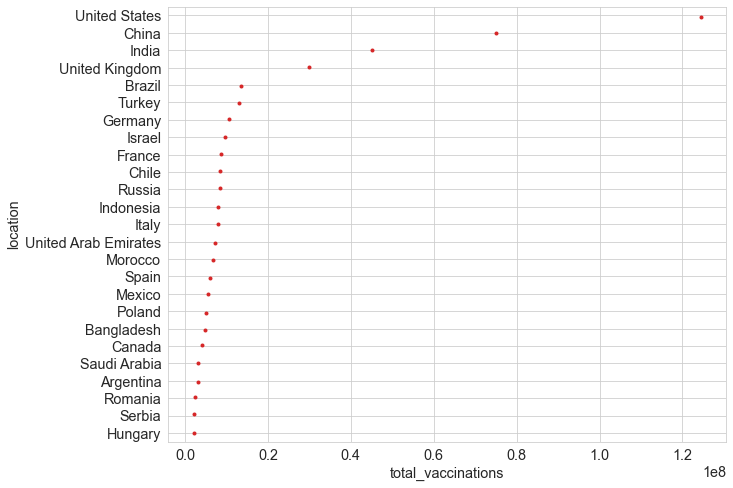

In [33]:
df_plot = df_world[df_world.population > 5000000].loc[set(df_world.index.get_level_values('location')).difference(['Africa','World', 'Europe','Asia', 'European Union', 'South America', 'North America'])].sort_index().reset_index().groupby('location').last().nlargest(25, 'total_vaccinations')
fig, ax = plt.subplots(figsize=(10,8))
sns.stripplot(data=df_plot, y=df_plot.index, x='total_vaccinations', color='C3', size=4)
ax.yaxis.grid()

In [4]:
df_world

iso_code continent  total_cases  new_cases  \
location    date                                                    
Afghanistan 2020-02-24      AFG      Asia          1.0        1.0   
            2020-02-25      AFG      Asia          1.0        0.0   
            2020-02-26      AFG      Asia          1.0        0.0   
            2020-02-27      AFG      Asia          1.0        0.0   
            2020-02-28      AFG      Asia          1.0        0.0   
...                         ...       ...          ...        ...   
Zimbabwe    2021-03-18      ZWE    Africa      36611.0       59.0   
            2021-03-19      ZWE    Africa      36652.0       41.0   
            2021-03-20      ZWE    Africa      36662.0       10.0   
            2021-03-21      ZWE    Africa      36665.0        3.0   
            2021-03-22      ZWE    Africa      36684.0       19.0   

                        new_cases_smoothed  total_deaths  new_deaths  \
location    date                                                       
Afghanistan 2020-02-24                 NaN           NaN         NaN   
            2020-02-25                 NaN           NaN         NaN   
            2020-02-26                 NaN           NaN         NaN   
            2020-02-27                 NaN           NaN         NaN   
            2020-02-28                 NaN           NaN         NaN   
...                                    ...           ...         ...   
Zimbabwe    2021-03-18              33.429        1509.0         1.0   
            2021-03-19              32.714        1510.0         1.0   
            2021-03-20              27.286        1510.0         0.0   
            2021-03-21              25.857        1512.0         2.0   
            2021-03-22              25.714        1514.0         2.0   

                        new_deaths_smoothed  total_cases_per_million  \
location    date                                                       
Afghanistan 2020-02-24                  NaN                    0.026   
            2020-02-25                  NaN                    0.026   
            2020-02-26                  NaN                    0.026   
            2020-02-27                  NaN                    0.026   
            2020-02-28                  NaN                    0.026   
...                                     ...                      ...   
Zimbabwe    2021-03-18                2.429                 2463.243   
            2021-03-19                2.000                 2466.001   
            2021-03-20                1.286                 2466.674   
            2021-03-21                1.286                 2466.876   
            2021-03-22                1.429                 2468.154   

                        new_cases_per_million  ...  gdp_per_capita  \
location    date                               ...                   
Afghanistan 2020-02-24                  0.026  ...        1803.987   
            2020-02-25                  0.000  ...        1803.987   
            2020-02-26                  0.000  ...        1803.987   
            2020-02-27                  0.000  ...        1803.987   
            2020-02-28                  0.000  ...        1803.987   
...                                       ...  ...             ...   
Zimbabwe    2021-03-18                  3.970  ...        1899.775   
            2021-03-19                  2.759  ...        1899.775   
            2021-03-20                  0.673  ...        1899.775   
            2021-03-21                  0.202  ...        1899.775   
            2021-03-22                  1.278  ...        1899.775   

                        extreme_poverty  cardiovasc_death_rate  \
location    date                                                 
Afghanistan 2020-02-24              NaN                597.029   
            2020-02-25              NaN                597.029   
            2020-02-26              NaN                597.029   
          

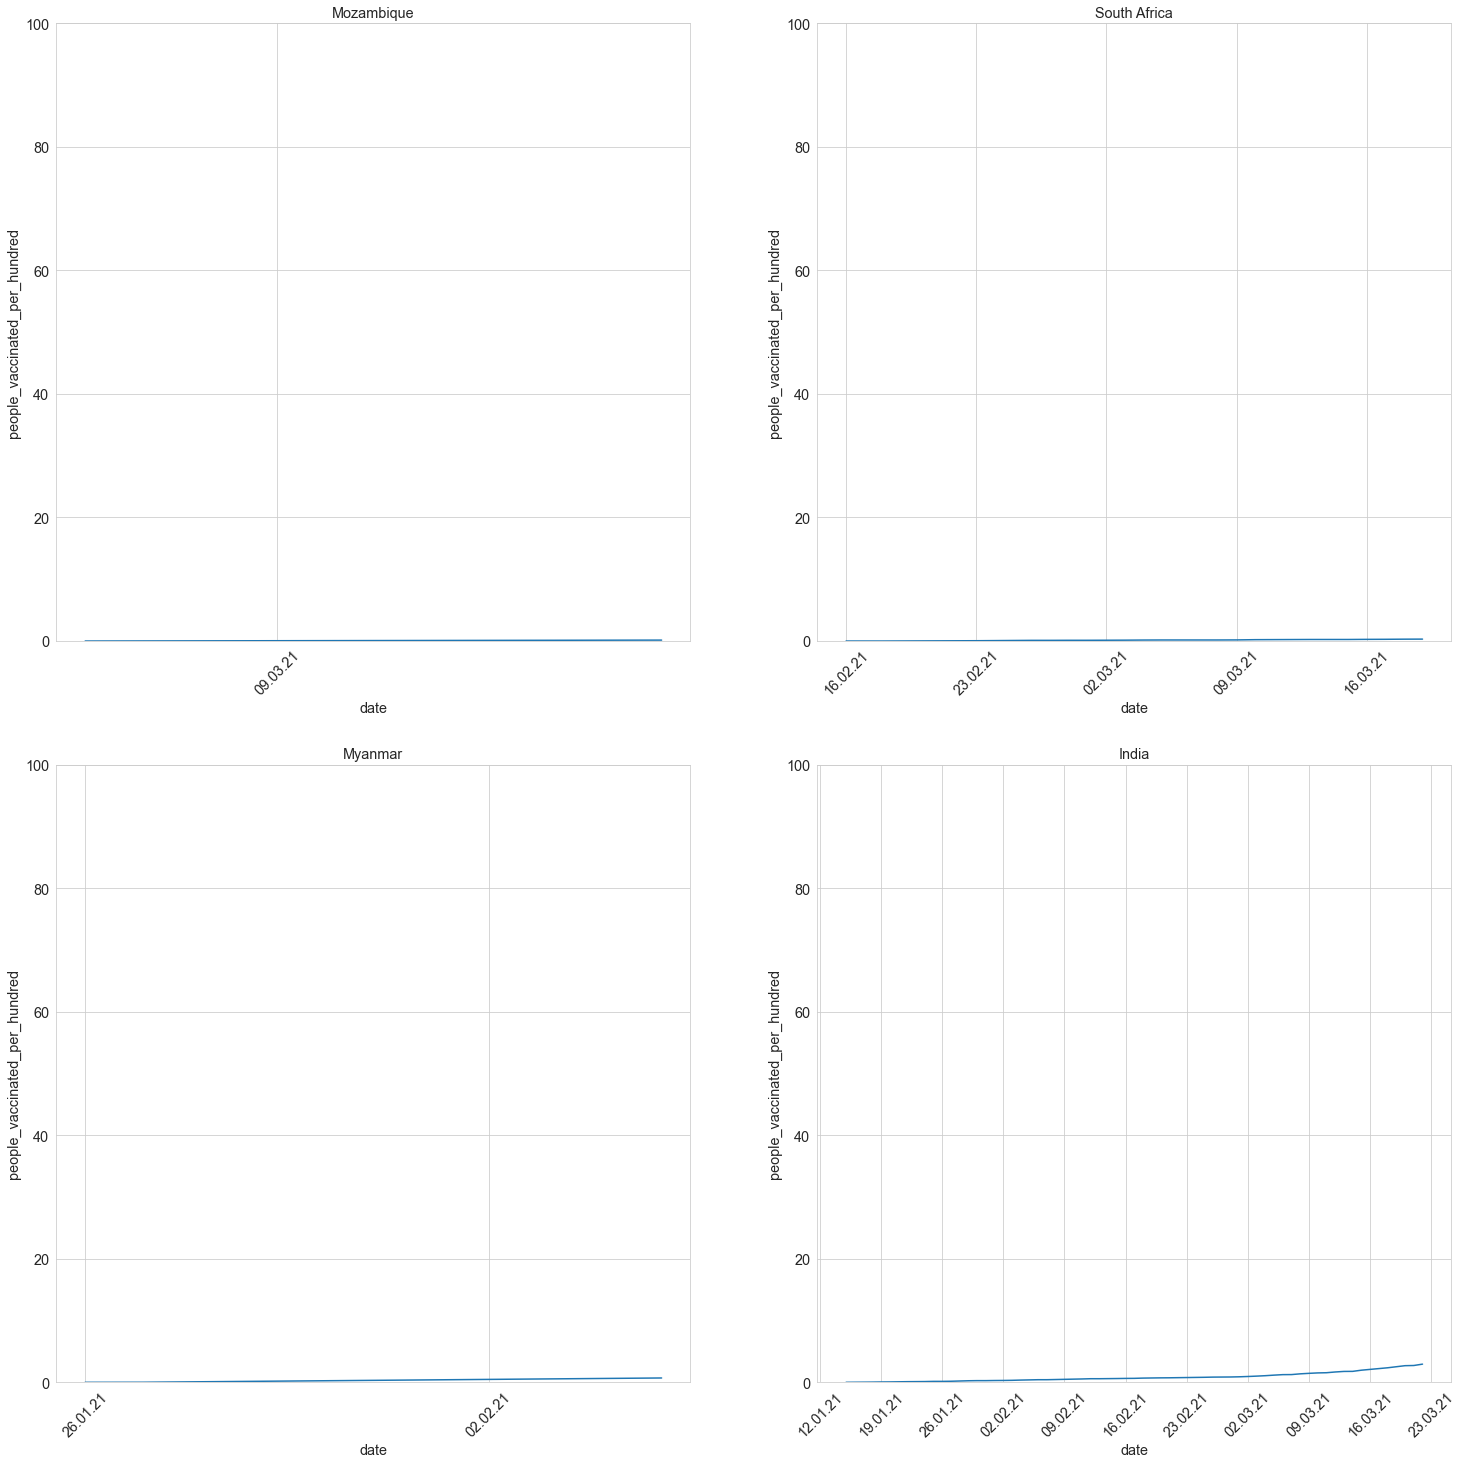

In [28]:
countries = np.random.choice(df_world[df_world.population > 10000000].index.get_level_values(0).drop_duplicates().to_list(), 4)

fig, ax = plt.subplots(2, 2, figsize=(25,25))
for i, country in enumerate(countries, 1):
    plt.subplot(2, 2, i)
    ax = sns.lineplot(data = df_world.loc[country], x=df_world.loc[country].index, y='people_vaccinated_per_hundred')
    ax.set_title(country)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_ylim(ymin=0, ymax=100)


In [20]:
df_world.loc['Germany'].index

DatetimeIndex(['2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
               '2020-02-04', '2020-02-05',
               ...
               '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16',
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
               '2021-03-21', '2021-03-22'],
              dtype='datetime64[ns]', name='date', length=421, freq=None)